In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

## Data Understanding & Exploration

In [ ]:
def explore_dataset(data, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [ ]:
train_df = '/content/drive/MyDrive/train_40k.csv'
val_df = '/content/drive/MyDrive/val_10k.csv'


df1 = pd.read_csv(train_df)
df2 = pd.read_csv(val_df)

In [ ]:
# lets check the information of traning dataset
explore_dataset(df1,train_df)

			EDA Dataset: /content/drive/MyDrive/train_40k.csv
Total Rows: 40000

Total Columns: 10

Columns: ['productId', 'Title', 'userId', 'Helpfulness', 'Score', 'Time', 'Text', 'Cat1', 'Cat2', 'Cat3']

Total Null Values: 16
productId       0
Title          16
userId          0
Helpfulness     0
Score           0
Time            0
Text            0
Cat1            0
Cat2            0
Cat3            0
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    40000 non-null  object 
 1   Title        39984 non-null  object 
 2   userId       40000 non-null  object 
 3   Helpfulness  40000 non-null  object 
 4   Score        40000 non-null  float64
 5   Time         40000 non-null  int64  
 6   Text         40000 non-null  object 
 7   Cat1         40000 non-null  object 
 8   Cat2         4

In [ ]:
# lets check the information of validation dataset
explore_dataset(df2,val_df)

			EDA Dataset: /content/drive/MyDrive/val_10k.csv
Total Rows: 10000

Total Columns: 10

Columns: ['productId', 'Title', 'userId', 'Helpfulness', 'Score', 'Time', 'Text', 'Cat1', 'Cat2', 'Cat3']

Total Null Values: 5
productId      0
Title          5
userId         0
Helpfulness    0
Score          0
Time           0
Text           0
Cat1           0
Cat2           0
Cat3           0
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    10000 non-null  object 
 1   Title        9995 non-null   object 
 2   userId       10000 non-null  object 
 3   Helpfulness  10000 non-null  object 
 4   Score        10000 non-null  float64
 5   Time         10000 non-null  int64  
 6   Text         10000 non-null  object 
 7   Cat1         10000 non-null  object 
 8   Cat2         10000 non-null 

In [ ]:
df1.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


## Data Cleaning & Analysis

In [ ]:
def check_categorical_numeric_binary_multiclass_columns(data):
    """
    In check_categorical_numeric_binary_multiclass_columns function we are doing all the things that given below:
    - checking the categorical features except binary multiclass label
    - checking numeric columns
    - checking binary multiclass columns that value counts exist between (2 to 10) 
    """
    cat_cols_without_binary_multiclass = []
    num_cols = []
    binary_multiclass_cols = []

    for i in data.columns:
        if data[i].dtypes =='object' and (not(data[i].nunique() >=2 and data[i].nunique()<=10)):
            cat_cols_without_binary_multiclass.append(i)        
        else:
            if data[i].nunique() >=2 and data[i].nunique()<=10:
                binary_multiclass_cols.append(i)
            else:
                num_cols.append(i) 

    print("Length of without binary multiclass catagorical columns: ",len(cat_cols_without_binary_multiclass))
    print(cat_cols_without_binary_multiclass)
    print(" ")
    print("Length of binary multiclass columns: ",len(binary_multiclass_cols))  
    print(binary_multiclass_cols)
    print(" ")
    
    print("Length of numeric columns: ",len(num_cols))    
    print(num_cols)
    print(" ")
    
    return cat_cols_without_binary_multiclass,binary_multiclass_cols,num_cols

Length of without binary multiclass catagorical columns:  7
['productId', 'Title', 'userId', 'Helpfulness', 'Text', 'Cat2', 'Cat3']
 
Length of binary multiclass columns:  2
['Score', 'Cat1']
 
Length of numeric columns:  1
['Time']
 
+-----------------------+------------------+
|                       |   DataTypesCount |
|-----------------------+------------------|
| categorical_features  |                7 |
| numerical_features    |                1 |
| binary/mutli_features |                2 |
+-----------------------+------------------+


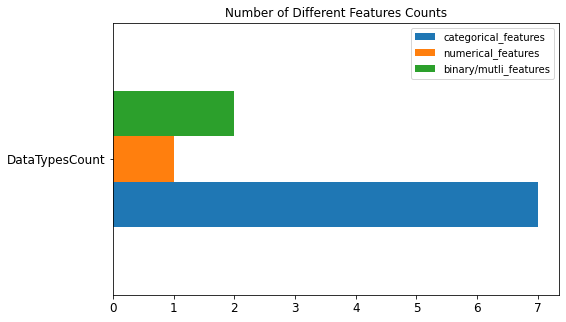

In [ ]:
# lets get the categroical, binary_multiclass and numeric columns
cat_cols, binary_multiclass_cols, numeric_cols = check_categorical_numeric_binary_multiclass_columns(df1)
categories_list = []
categories_list.append(len(cat_cols))
categories_list.append(len(numeric_cols))
categories_list.append(len(binary_multiclass_cols))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary/mutli_features"], 
                             columns=['DataTypesCount'])
print(tabulate(categories_df, headers = 'keys', tablefmt = 'psql'))

categories_df = categories_df.transpose().plot(kind="barh", figsize=(8, 5), title="Number of Different Features Counts", fontsize=12)

In [ ]:
def categroy_distribution(data, col, top=None):
    print("\t\t{} Distribution".format(col))
    print()
    perc = round(data[col].value_counts(normalize=True)[:top]*100,2)

    dataCat = perc.to_frame().reset_index().rename(columns={'index':'Category',
                                                          col:f'{col}Perc'})
    print(tabulate(dataCat, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(7,7))
    fig = sns.countplot(x=col, data=data, color="g", order=data[col].value_counts().iloc[:top].index)
    for p in fig.patches:
        fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+10), size=15)
    plt.xticks(rotation=90)
    plt.show()

		Cat1 Distribution

+----+----------------------+------------+
|    | Category             |   Cat1Perc |
|----+----------------------+------------|
|  0 | toys games           |      25.66 |
|  1 | health personal care |      24.43 |
|  2 | beauty               |      14.62 |
|  3 | baby products        |      14.09 |
|  4 | pet supplies         |      12.16 |
|  5 | grocery gourmet food |       9.04 |
+----+----------------------+------------+


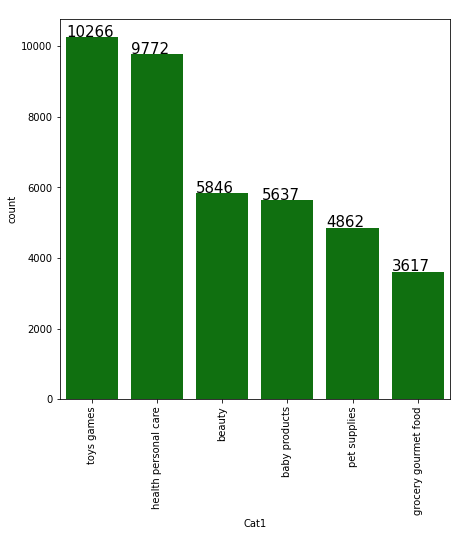

		Cat2 Distribution

+----+----------------------------+------------+
|    | Category                   |   Cat2Perc |
|----+----------------------------+------------|
|  0 | personal care              |       7.13 |
|  1 | dogs                       |       6.52 |
|  2 | nutrition wellness         |       5.51 |
|  3 | health care                |       5    |
|  4 | cats                       |       4.45 |
|  5 | hair care                  |       4.43 |
|  6 | games                      |       3.81 |
|  7 | skin care                  |       3.35 |
|  8 | medical supplies equipment |       3.22 |
|  9 | fragrance                  |       3.09 |
+----+----------------------------+------------+


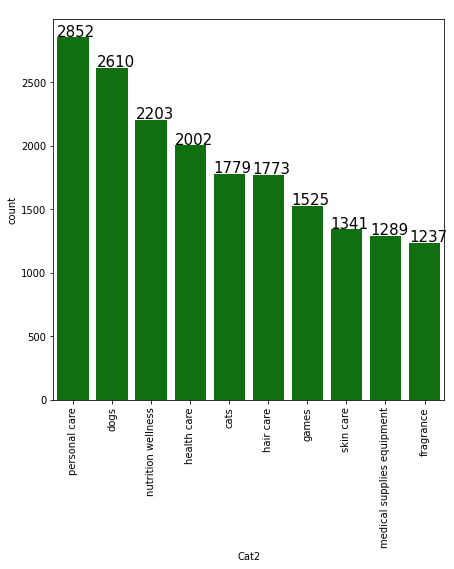

		Cat3 Distribution

+----+----------------------+------------+
|    | Category             |   Cat3Perc |
|----+----------------------+------------|
|  0 | unknown              |       5.66 |
|  1 | shaving hair removal |       3.91 |
|  2 | vitamins supplements |       3.29 |
|  3 | board games          |       2.31 |
|  4 | styling tools        |       2.12 |
|  5 | women s              |       1.84 |
|  6 | face                 |       1.82 |
|  7 | toys                 |       1.7  |
|  8 | figures              |       1.63 |
|  9 | dolls                |       1.63 |
+----+----------------------+------------+


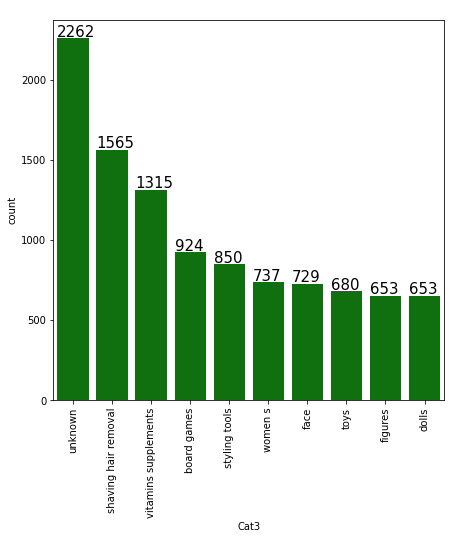

In [ ]:
categroy_distribution(df1,'Cat1')
categroy_distribution(df1,'Cat2', top=10)
categroy_distribution(df1,'Cat3', top=10)

In [ ]:
def fill_missing_values(data, cols,cols_dtypes):
    """
    In fill_missing_values function we are doing all the things that given below:
    - filling the categorical features with most frequent value
    - filling the numeric features with mean/average value
    """
    if cols_dtypes.lower() == 'categorical':
        for col in cols:
            data[col] = data[col].fillna(data[col].value_counts().index[0])
    elif cols_dtypes.lower() == 'numeric':
        for col in cols:
            data[col] = data[col].fillna(data[col].mean())
    return data

In [ ]:
# lets fill the missing values with specific approach
# filling null values of training dataset
df1 = fill_missing_values(df1,binary_multiclass_cols,'categorical')
df1 = fill_missing_values(df1,numeric_cols,'numeric')

# filling null values of validation dataset
df2 = fill_missing_values(df2,binary_multiclass_cols,'categorical')
df2 = fill_missing_values(df2,numeric_cols,'numeric')

In [ ]:
def pie_chart_distribution(data, cols):
    """
    In pie_chart_distribution function we are plotting the PIE chart of all categroical
    features.
    """
    plt.rcParams['font.size'] = 13
    for col in cols:
        print("="*50)
        print(f"\t Feature: {col}")
        print("="*50)
        final = (round(data[col].value_counts(normalize=True),3)*100).to_frame()
        print(tabulate(final, headers = 'keys', tablefmt = 'psql'))
        
        plt.figure(figsize=(7,8))
        data[col].value_counts().plot(kind='pie', autopct='%1.0f%%').legend()
        plt.legend(bbox_to_anchor=(1,0.9))
        plt.show()

	 Feature: Score
+----+---------+
|    |   Score |
|----+---------|
|  5 |    58.4 |
|  4 |    17.2 |
|  1 |    10.4 |
|  3 |     7.8 |
|  2 |     6.1 |
+----+---------+


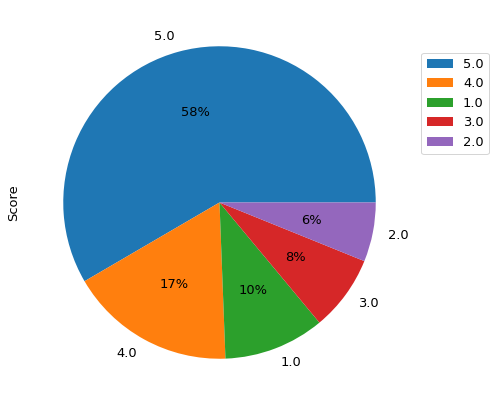

	 Feature: Cat1
+----------------------+--------+
|                      |   Cat1 |
|----------------------+--------|
| toys games           |   25.7 |
| health personal care |   24.4 |
| beauty               |   14.6 |
| baby products        |   14.1 |
| pet supplies         |   12.2 |
| grocery gourmet food |    9   |
+----------------------+--------+


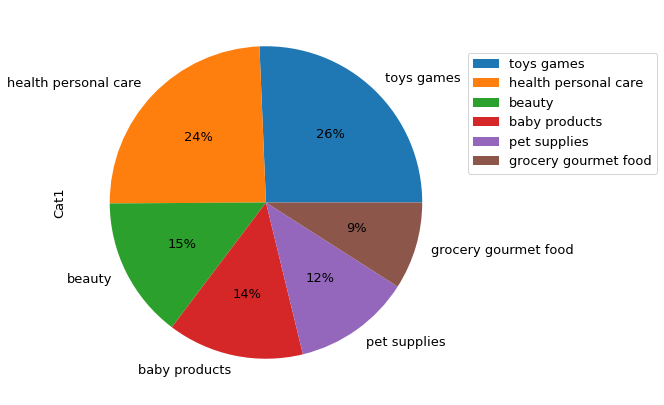

In [ ]:
pie_chart_distribution(df1, binary_multiclass_cols)

* We can see above the distribution of each categorical features

In [ ]:
# lets try to check the length of each text of training dataset
df1['length_text'] = df1['Text'].str.len()

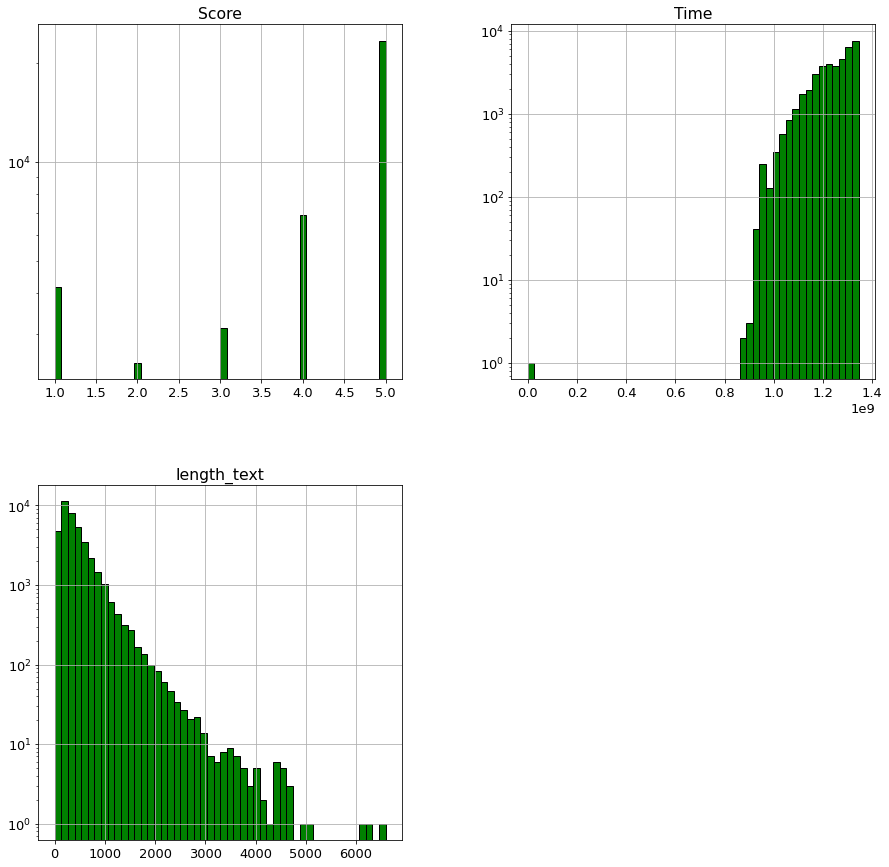

In [ ]:
def plot_histogram(data):
    # Overall idea about distribution of data histogram 
    data.select_dtypes(include=[int, float]).hist(bins=50, figsize=(15,15), log=True, color = "g", edgecolor='black')
    plt.show()
    
plot_histogram(df1)

## Data Preprocessing

In [ ]:
# lets combine Title, Text, Cat2 and Cat3  and will use for input Final Text

# training dataset
df1['final_text'] = df1['Title']+' '+df1['Text']+' '+df1['Cat2']+' '+df1['Cat3']

# validation dataset
df2['final_text'] = df2['Title']+' '+df2['Text']+' '+df2['Cat2']+' '+df2['Cat3']

In [ ]:
# !pip install WordCloud

In [ ]:
# importing the NLP libraries that will be used for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer() #creating an instance of the class

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text):
    """In preprocess_text function we will apply all the things that given below:
    - removing links
    - removing special characters
    - removing punctuations
    - removing numbers
    - removing stopwords
    - doing stemming
    - transforming in lowercase
    - removing excessive whitespaces
    """
    # remove links
    text = re.sub(r"http\S+", "", str(text))
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", str(text))
    # remove punctuations in string
    text = re.sub(r'[^\w\s]', "", str(text)) 
    
    # remove stopwords, doing stemming
    # 1. tokenize
    tokens = nltk.word_tokenize(text)
    # 2. check if stopword and lemmatizing the word
    tokens = [lemma.lemmatize(w) for w in tokens if not w.lower() in stopwords.words("english") if len(w)>=3]
    # 3. join back together
    text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
# lets get the clean text of training dataset
df1['cleaned'] = df1['final_text'].apply(lambda x: preprocess_text(x))

# lets get the clean text of validation dataset
df2['cleaned'] = df2['final_text'].apply(lambda x: preprocess_text(x))

In [ ]:
def label_encoding(x):
    if x == 'toys games':return 0
    elif x == 'health personal care':return 1
    elif x == 'baby products':return 2
    elif x == 'beauty':return 3
    elif x == 'grocery gourmet food':return 4
    else:return 5

In [ ]:
# lets convert categorical label into numeric format

# label encoding target feature of training dataset
df1['label'] = df1['Cat1'].apply(lambda x: label_encoding(x))

# label encoding target feature of validation dataset
df2['label'] = df2['Cat1'].apply(lambda x: label_encoding(x))

In [ ]:
# lets Preview the cleaned dataset again
df1.head(2)

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,length_text,final_text,cleaned,label
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,130,Golden Valley Natural Buffalo Jerky The descri...,golden valley natural buffalo jerky descriptio...,4
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,249,Westing Game This was a great book!!!! It is w...,westing game great book well thought easily im...,0


In [ ]:
df2.head(2)

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,final_text,cleaned,label
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1/1,4.0,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps,PetSafe Staywell Pet Door with Clear Hard Flap...,petsafe staywell pet door clear hard flap inst...,5
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,0/0,1.0,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food,"Kaytee Timothy Cubes, 1-Pound My bunny had a h...",kaytee timothy cubes pound bunny hard time eat...,5


In [ ]:
# define a function for getting all words from the text
def returning_tokinize_list(df,column_name):
    df = df.reset_index(drop=True)  
    tokenize_list = [word_tokenize(df[column_name][i]) for i in range(df.shape[0])]
    final = [j for i in tokenize_list for j in i]
    return final     

In [ ]:
# get the all words of text into list
tokenize_list_words= returning_tokinize_list(df1, 'cleaned')

In [ ]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return df_

# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

# plotting the graph of most common words
def frequency_dis_graph(cleaned_col_name_list,num_of_words=10):
    fdist = FreqDist(cleaned_col_name_list)
    fdist.plot(num_of_words,cumulative=False, marker='o')
    plt.show()

# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordCloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

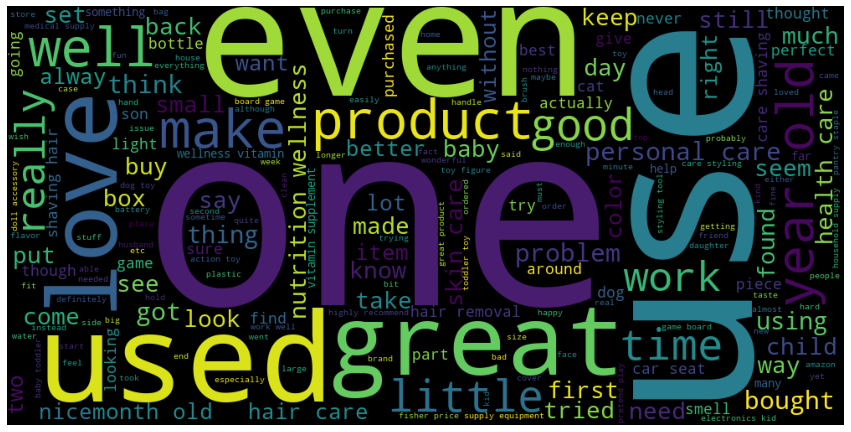

       word  Frequency_distribution
0       one                   16716
1   product                   14909
2      like                   13353
3       toy                   13331
4     great                   11678
5     would                   10929
6       get                   10918
7      love                   10865
8      care                   10366
9      hair                   10193
10      use                   10138
11     time                    9916
12     year                    8556
13     good                    8380
14      dog                    7985


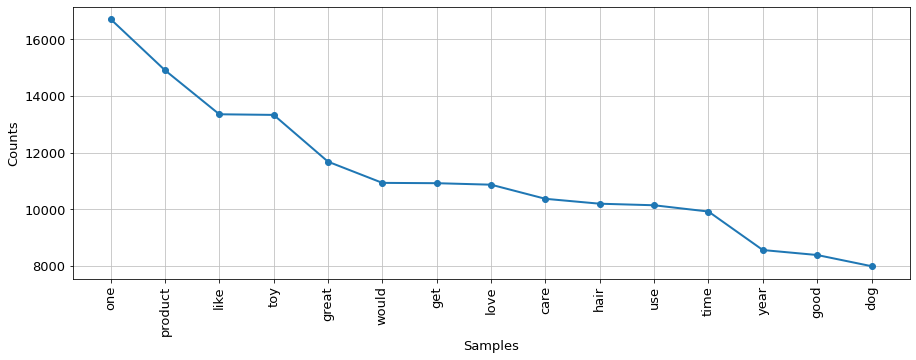

In [ ]:
# draw word cloud
word_cloud(tokenize_list_words)

# lets try to check the 15 most common words
MCW = most_common_words(tokenize_list_words, common_words=15)
print(table_format(MCW, 'word'))

# graph for showing top 15 most common words
plt.figure(figsize=(15,5))
frequency_dis_graph(tokenize_list_words,num_of_words=15)

* From above analysis, we can see the most common words in training data file.

## Model Building and Evaluation

In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Data Splition

* split data 50% for validation from validation file
* split data 50% for testing from validation file

In [ ]:
# lets get dependent and independent features
X = df2['cleaned']
y = df2['label']

In [ ]:
#split data into 50% validation and 50% testing set
x_val, x_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [ ]:
x_train,y_train = df1['cleaned'], df1['label']

In [ ]:
print("Training Dataset Shape:", x_train.shape)
print("Validation Dataset Shape:", x_val.shape)
print("Testing Dataset Shape:", x_test.shape)

Training Dataset Shape: (40000,)
Validation Dataset Shape: (5000,)
Testing Dataset Shape: (5000,)


### Feature Extraction From TfidfVectorizer
* TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

In [ ]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train.values)
print ("Number of features : %d" %len(tfidf.get_feature_names()))

Number of features : 47097


In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("="*100)
    print("\t\t\t{}".format(model_name))
    print("="*100)
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions, average='macro')))    
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions, average='macro')))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions, average='macro')))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, 
                                                                 target_names=['toys games', 'health personal care',
                                                                               'baby products', 'beauty','grocery gourmet food',
                                                                               'pet supplies']))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.set(font_scale=1)
    cm = confusion_matrix(y_test_set, predictions)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(6, 6)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

### Logistic Regression Model

			logistic Regression

Accuracy on validation set: 0.9890
Precision on validation set: 0.9887
Recall on validation set: 0.9852
F1_Score on validation set: 0.9869

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.99      1.00      0.99       879
health personal care       0.99      1.00      0.99      1496
       baby products       0.98      0.96      0.97       349
              beauty       0.99      0.99      0.99      1068
grocery gourmet food       1.00      0.99      0.99       420
        pet supplies       0.99      0.98      0.99       788

            accuracy                           0.99      5000
           macro avg       0.99      0.99      0.99      5000
        weighted avg       0.99      0.99      0.99      5000


Confusion Matrix : 
 [[ 876    0    1    0    0    2]
 [   0 1489    1    5    1    0]
 [   3    1  335    8    0    2]
 [   0   12    1 1055    0    0]
 [   0    3    1    0  415    1]


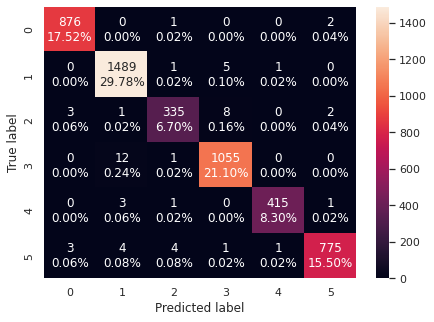

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
predictions_lr = lr.predict(tfidf.transform(x_val))
predictions_train = lr.predict(tfidf.transform(x_train))

results_lr = modelEvaluation(predictions_lr, y_val, "logistic Regression")

### Navie Bayes Model

			Multinomial NB

Accuracy on validation set: 0.9364
Precision on validation set: 0.9543
Recall on validation set: 0.9117
F1_Score on validation set: 0.9296

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.91      1.00      0.95       879
health personal care       0.88      0.99      0.93      1496
       baby products       0.95      0.84      0.89       349
              beauty       0.98      0.91      0.95      1068
grocery gourmet food       1.00      0.83      0.91       420
        pet supplies       1.00      0.89      0.94       788

            accuracy                           0.94      5000
           macro avg       0.95      0.91      0.93      5000
        weighted avg       0.94      0.94      0.94      5000


Confusion Matrix : 
 [[ 876    2    1    0    0    0]
 [   4 1483    3    5    1    0]
 [  32   13  294    9    0    1]
 [   4   89    0  975    0    0]
 [  13   55    1    1  350    0]
 [  3

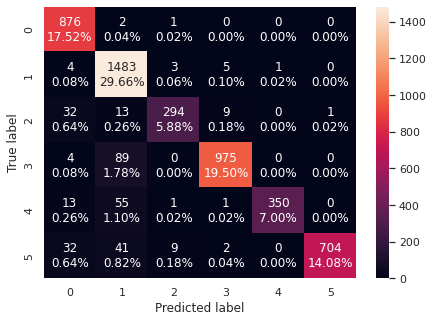

In [ ]:
gnb = MultinomialNB()
gnb.fit(x_train_tfidf, y_train)
predictions = gnb.predict(tfidf.transform(x_val))
results_gnb = modelEvaluation(predictions, y_val, "Multinomial NB")

### Random Forest Model

			RandomForestClassifier

Accuracy on validation set: 0.9922
Precision on validation set: 0.9922
Recall on validation set: 0.9876
F1_Score on validation set: 0.9898

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.99      1.00      0.99       879
health personal care       1.00      1.00      1.00      1496
       baby products       0.99      0.96      0.98       349
              beauty       0.99      0.99      0.99      1068
grocery gourmet food       1.00      0.99      0.99       420
        pet supplies       0.99      0.99      0.99       788

            accuracy                           0.99      5000
           macro avg       0.99      0.99      0.99      5000
        weighted avg       0.99      0.99      0.99      5000


Confusion Matrix : 
 [[ 877    0    0    0    0    2]
 [   0 1493    0    2    0    1]
 [   7    1  334    7    0    0]
 [   1    4    0 1061    0    2]
 [   0    1    1    0  415    

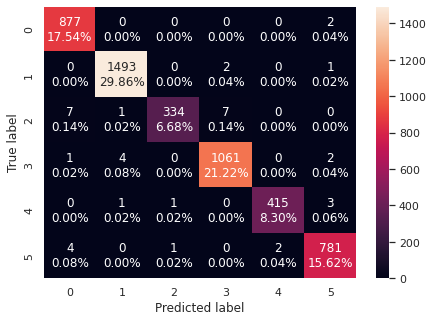

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
predictions = rf.predict(tfidf.transform(x_val))
results_rf = modelEvaluation(predictions, y_val, "RandomForestClassifier")

## Models Evaluation

In [ ]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'LogisticRegression (TF-IDF)' : results_lr,
    'MultinomialNB (TF-IDF)' : results_gnb,
    'Random Forest (TF-IDF)' : results_rf,

}
metrics_df = pd.DataFrame(dic)

metrics_df1 = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df1.T, headers = 'keys', tablefmt = 'psql'))

+-----------------------------+------------+-------------+----------+------------+
|                             |   accuracy |   precision |   recall |   f1-score |
|-----------------------------+------------+-------------+----------+------------|
| LogisticRegression (TF-IDF) |     0.989  |    0.98872  | 0.985203 |   0.986939 |
| MultinomialNB (TF-IDF)      |     0.9364 |    0.954309 | 0.91166  |   0.929622 |
| Random Forest (TF-IDF)      |     0.9922 |    0.9922   | 0.987566 |   0.989817 |
+-----------------------------+------------+-------------+----------+------------+


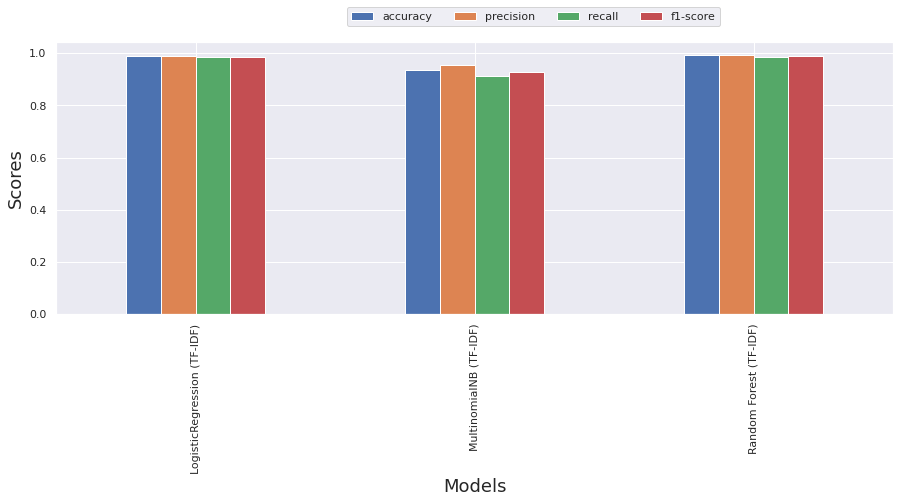

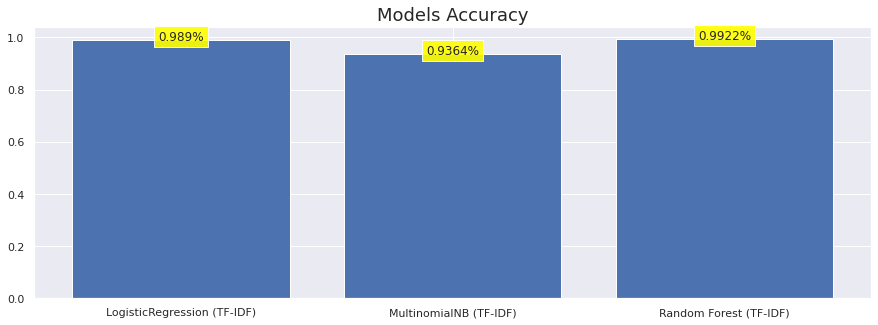

In [ ]:
metrics_df1.T.plot(kind='bar', figsize=(15,5))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(0.8,1.15))
plt.show()

models_acc = metrics_df1.iloc[0].tolist()
models_names = metrics_df1.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

### Feature Extraction From Bag of Words (CounterVectorizer)
* It is one of the most used text vectorization techniques. A bag-of-words is a representation of text that describes the occurrence of words within a document.

In [ ]:
# Fit and transform the training data to a document-term matrix using CountVectorizer 
counterVec = CountVectorizer()

x_train_counterVec = counterVec.fit_transform(x_train.values)
print ("Number of features : %d" %len(counterVec.get_feature_names()))

Number of features : 47097


			logistic Regression

Accuracy on validation set: 0.9952
Precision on validation set: 0.9949
Recall on validation set: 0.9942
F1_Score on validation set: 0.9945

Classification report : 
                       precision    recall  f1-score   support

          toys games       1.00      1.00      1.00       879
health personal care       0.99      1.00      1.00      1496
       baby products       0.99      0.99      0.99       349
              beauty       0.99      0.99      0.99      1068
grocery gourmet food       1.00      0.99      1.00       420
        pet supplies       1.00      0.99      1.00       788

            accuracy                           1.00      5000
           macro avg       0.99      0.99      0.99      5000
        weighted avg       1.00      1.00      1.00      5000


Confusion Matrix : 
 [[ 878    0    1    0    0    0]
 [   0 1492    0    4    0    0]
 [   0    0  345    3    0    1]
 [   0    6    2 1060    0    0]
 [   1    1    0    0  417    1]


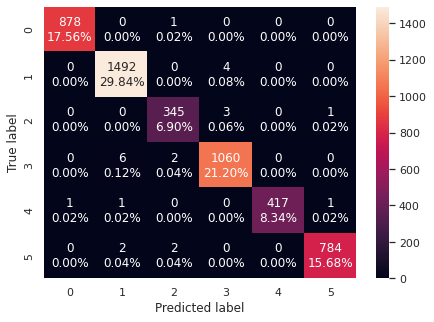

In [ ]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train_counterVec, y_train)
predictions_lr = lr.predict(counterVec.transform(x_val))
results_lr_countVec = modelEvaluation(predictions_lr, y_val, "logistic Regression")

			Multinomial NB

Accuracy on validation set: 0.9720
Precision on validation set: 0.9666
Recall on validation set: 0.9674
F1_Score on validation set: 0.9669

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.98      0.99      0.99       879
health personal care       0.97      0.97      0.97      1496
       baby products       0.94      0.91      0.93       349
              beauty       0.97      0.97      0.97      1068
grocery gourmet food       0.95      0.98      0.96       420
        pet supplies       0.99      0.98      0.98       788

            accuracy                           0.97      5000
           macro avg       0.97      0.97      0.97      5000
        weighted avg       0.97      0.97      0.97      5000


Confusion Matrix : 
 [[ 871    2    4    0    1    1]
 [   0 1450    7   12   20    7]
 [  12    3  319   13    0    2]
 [   1   24    3 1038    1    1]
 [   0    6    1    1  412    0]
 [   

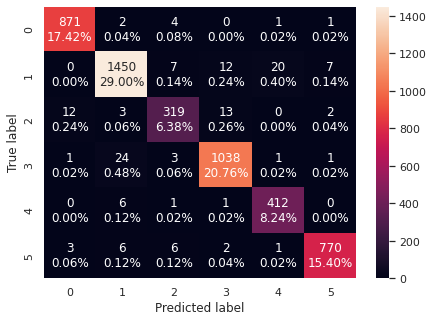

In [ ]:
# Navie Bayes Model
gnb = MultinomialNB()
gnb.fit(x_train_counterVec, y_train)
predictions = gnb.predict(counterVec.transform(x_val))
results_gnb_countVec = modelEvaluation(predictions, y_val, "Multinomial NB")

			RandomForestClassifier

Accuracy on validation set: 0.9932
Precision on validation set: 0.9935
Recall on validation set: 0.9880
F1_Score on validation set: 0.9907

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.99      1.00      0.99       879
health personal care       1.00      1.00      1.00      1496
       baby products       1.00      0.95      0.97       349
              beauty       0.99      1.00      0.99      1068
grocery gourmet food       1.00      0.99      0.99       420
        pet supplies       1.00      0.99      0.99       788

            accuracy                           0.99      5000
           macro avg       0.99      0.99      0.99      5000
        weighted avg       0.99      0.99      0.99      5000


Confusion Matrix : 
 [[ 879    0    0    0    0    0]
 [   0 1494    0    2    0    0]
 [   7    0  332   10    0    0]
 [   1    2    0 1064    0    1]
 [   0    2    1    0  416    

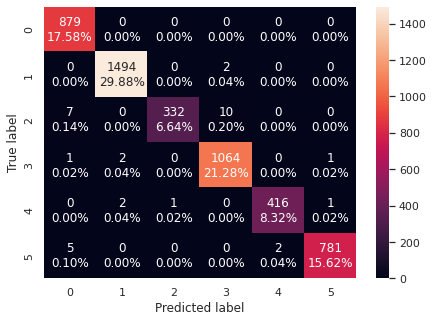

In [ ]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(x_train_counterVec, y_train)
predictions = rf.predict(counterVec.transform(x_val))
results_rf_countVec = modelEvaluation(predictions, y_val, "RandomForestClassifier")

In [ ]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'LogisticRegression (CountVectorizer)' : results_lr_countVec,
    'MultinomialNB (CountVectorizer)' : results_gnb_countVec,
    'Random Forest (CountVectorizer)' : results_rf_countVec,

}
metrics_df = pd.DataFrame(dic)

metrics_df2 = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df2.T, headers = 'keys', tablefmt = 'psql'))

+--------------------------------------+------------+-------------+----------+------------+
|                                      |   accuracy |   precision |   recall |   f1-score |
|--------------------------------------+------------+-------------+----------+------------|
| LogisticRegression (CountVectorizer) |     0.9952 |    0.994913 | 0.99417  |   0.994538 |
| MultinomialNB (CountVectorizer)      |     0.972  |    0.966579 | 0.967368 |   0.966891 |
| Random Forest (CountVectorizer)      |     0.9932 |    0.993544 | 0.987967 |   0.990652 |
+--------------------------------------+------------+-------------+----------+------------+


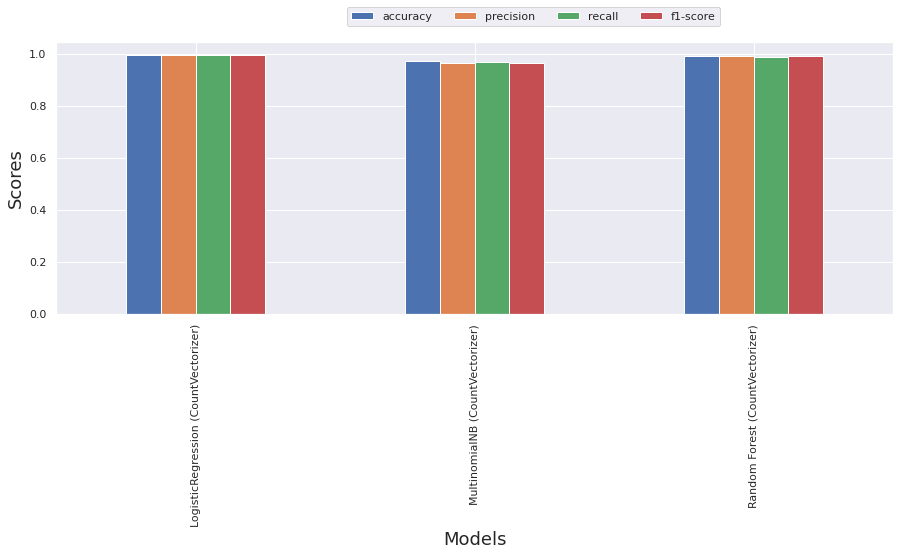

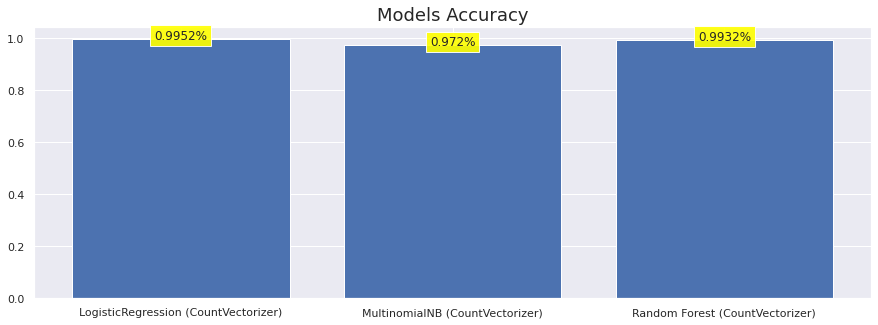

In [ ]:
metrics_df2.T.plot(kind='bar', figsize=(15,5))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(0.8,1.15))
plt.show()

models_acc = metrics_df2.iloc[0].tolist()
models_names = metrics_df2.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

### Feature Extraction From  Bag of n-grams
* A bag-of-n -grams model represents a text document as an unordered collection of its n-grams.

In [ ]:
train = df1[['cleaned', 'label']]
val = pd.concat([x_val, y_val], axis = 1)

In [ ]:
# Create a vocab of n-grams from the dataframe
def ngrams(df, vocab_size = 1000, max_n=1):
  vectorizer = CountVectorizer(max_features=vocab_size, ngram_range=(1,max_n))
  X = vectorizer.fit_transform(df["cleaned"])

  bow_df = pd.DataFrame(X.toarray())
  column_names = [str(i) for i in range(vocab_size)]
  for k, v in vectorizer.vocabulary_.items():
    column_names[v] = k
  bow_df.columns = column_names

  # bow_df["opinion_without_stopwords"] = df["opinion_without_stopwords"].reset_index()['opinion_without_stopwords']
  bow_df["label"] = df["label"].reset_index()['label']

  return bow_df


In [ ]:
# create bigrams DataFrame N-grams 2
bigram_df_train = ngrams(train,vocab_size = 1000, max_n=2)
bigram_df_val = ngrams(val,vocab_size = 1000, max_n=2)


In [ ]:
X_train = bigram_df_train.iloc[:,:-1]
y_train = bigram_df_train.iloc[:,-1]

X_val = bigram_df_val.iloc[:,:-1]
y_val = bigram_df_val.iloc[:,-1]

			logistic Regression

Accuracy on validation set: 0.1962
Precision on validation set: 0.2199
Recall on validation set: 0.2071
F1_Score on validation set: 0.1811

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.25      0.44      0.32       879
health personal care       0.40      0.14      0.21      1496
       baby products       0.08      0.23      0.12       349
              beauty       0.24      0.09      0.13      1068
grocery gourmet food       0.07      0.16      0.10       420
        pet supplies       0.28      0.18      0.22       788

            accuracy                           0.20      5000
           macro avg       0.22      0.21      0.18      5000
        weighted avg       0.27      0.20      0.20      5000


Confusion Matrix : 
 [[387  57 175  66  91 103]
 [459 206 387 115 268  61]
 [104  55  80  33  46  31]
 [236  64 172  97 371 128]
 [ 88  87  95  34  69  47]
 [294  43 126  51 132 142]]


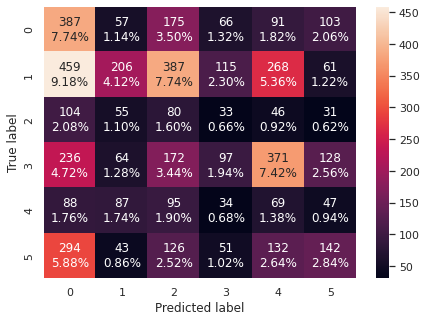

In [ ]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_val)
results_lr_ngram = modelEvaluation(predictions_lr, y_val, "logistic Regression")

			Multinomial NB

Accuracy on validation set: 0.2768
Precision on validation set: 0.2311
Recall on validation set: 0.2531
F1_Score on validation set: 0.2246

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.29      0.43      0.34       879
health personal care       0.44      0.41      0.42      1496
       baby products       0.10      0.28      0.15       349
              beauty       0.17      0.04      0.06      1068
grocery gourmet food       0.11      0.07      0.09       420
        pet supplies       0.27      0.29      0.28       788

            accuracy                           0.28      5000
           macro avg       0.23      0.25      0.22      5000
        weighted avg       0.28      0.28      0.26      5000


Confusion Matrix : 
 [[377 131  98  86  23 164]
 [364 608 304  44  42 134]
 [ 85  95  99  21  10  39]
 [164 274 256  40 111 223]
 [100 115 102  22  29  52]
 [230 145 116  27  39 231]]


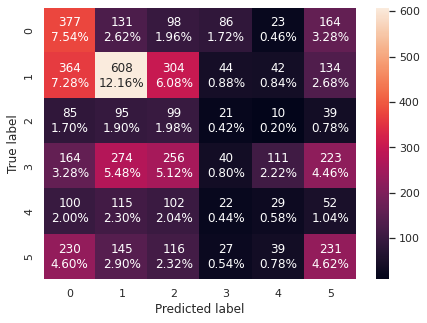

In [ ]:
# Navie Bayes Model
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_val)
results_gnb_ngram = modelEvaluation(predictions, y_val, "Multinomial NB")

			RandomForestClassifier

Accuracy on validation set: 0.2044
Precision on validation set: 0.2327
Recall on validation set: 0.2237
F1_Score on validation set: 0.1908

Classification report : 
                       precision    recall  f1-score   support

          toys games       0.28      0.48      0.35       879
health personal care       0.31      0.13      0.19      1496
       baby products       0.09      0.28      0.14       349
              beauty       0.29      0.09      0.14      1068
grocery gourmet food       0.08      0.20      0.11       420
        pet supplies       0.35      0.15      0.21       788

            accuracy                           0.20      5000
           macro avg       0.23      0.22      0.19      5000
        weighted avg       0.27      0.20      0.20      5000


Confusion Matrix : 
 [[418  94 140  64 119  44]
 [505 198 367  80 324  22]
 [ 84  63  99  31  62  10]
 [250 118 208 101 338  53]
 [ 44  69  93  36  85  93]
 [184 101 203  42 137 121]]

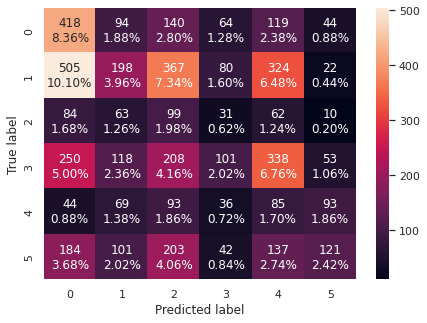

In [ ]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_val)
results_rf_ngram = modelEvaluation(predictions, y_val, "RandomForestClassifier")

In [ ]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'LogisticRegression (n-grams)' : results_lr_ngram,
    'MultinomialNB (n-grams)' : results_gnb_ngram,
    'Random Forest (n-grams)' : results_rf_ngram,

}
metrics_df = pd.DataFrame(dic)

metrics_df3 = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df3.T, headers = 'keys', tablefmt = 'psql'))

+------------------------------+------------+-------------+----------+------------+
|                              |   accuracy |   precision |   recall |   f1-score |
|------------------------------+------------+-------------+----------+------------|
| LogisticRegression (n-grams) |     0.1962 |    0.219895 | 0.207085 |   0.181142 |
| MultinomialNB (n-grams)      |     0.2768 |    0.231075 | 0.253105 |   0.224581 |
| Random Forest (n-grams)      |     0.2044 |    0.232749 | 0.223677 |   0.19083  |
+------------------------------+------------+-------------+----------+------------+


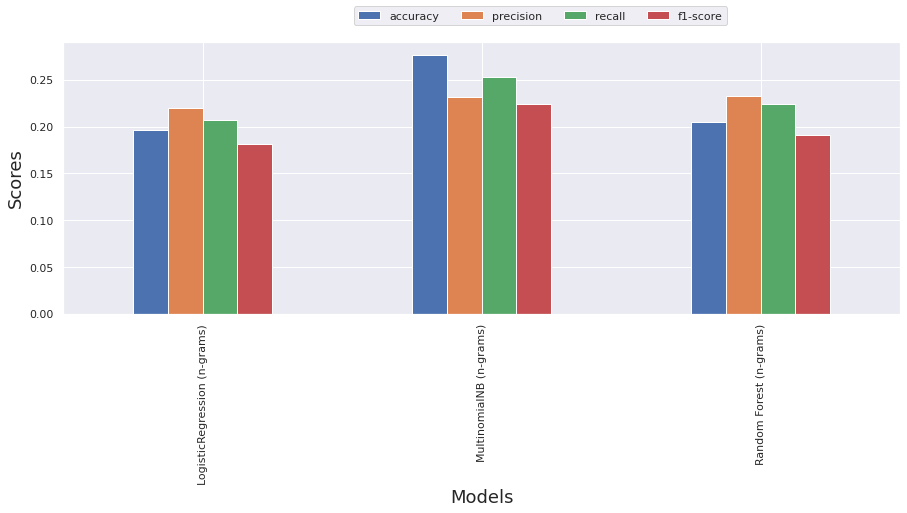

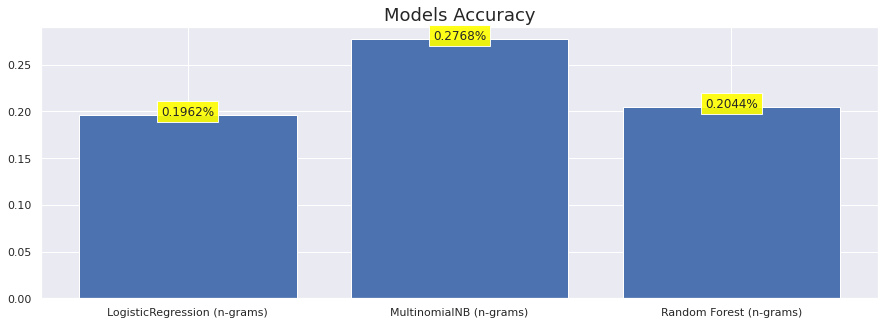

In [ ]:
metrics_df3.T.plot(kind='bar', figsize=(15,5))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(0.8,1.15))
plt.show()

models_acc = metrics_df3.iloc[0].tolist()
models_names = metrics_df3.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

# **All Models Evaluation**

In [ ]:
final_df = pd.concat([metrics_df1,metrics_df2,metrics_df3], axis = 1).T
# displaying the DataFrame
print(tabulate(final_df, headers = 'keys', tablefmt = 'psql'))

+--------------------------------------+------------+-------------+----------+------------+
|                                      |   accuracy |   precision |   recall |   f1-score |
|--------------------------------------+------------+-------------+----------+------------|
| LogisticRegression (TF-IDF)          |     0.989  |    0.98872  | 0.985203 |   0.986939 |
| MultinomialNB (TF-IDF)               |     0.9364 |    0.954309 | 0.91166  |   0.929622 |
| Random Forest (TF-IDF)               |     0.9922 |    0.9922   | 0.987566 |   0.989817 |
| LogisticRegression (CountVectorizer) |     0.9952 |    0.994913 | 0.99417  |   0.994538 |
| MultinomialNB (CountVectorizer)      |     0.972  |    0.966579 | 0.967368 |   0.966891 |
| Random Forest (CountVectorizer)      |     0.9932 |    0.993544 | 0.987967 |   0.990652 |
| LogisticRegression (n-grams)         |     0.1962 |    0.219895 | 0.207085 |   0.181142 |
| MultinomialNB (n-grams)              |     0.2768 |    0.231075 | 0.253105 |  

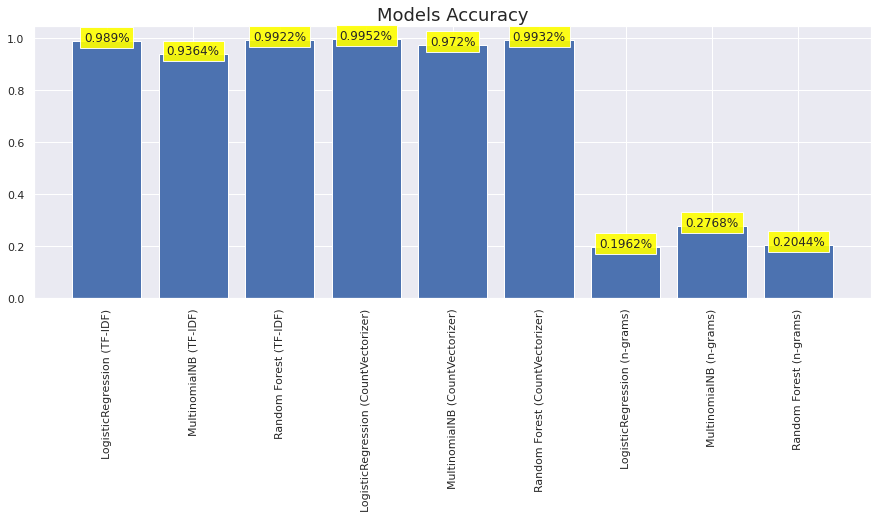

In [ ]:
models_acc = final_df.T.iloc[0].tolist()
models_names = final_df.T.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],4),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.xticks(rotation=90)
plt.show()